In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
import f3dasm
import rvesimulator


2023-04-20 12:51:03,510 - Imported f3dasm
2023-04-20 12:51:04.413472: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-20 12:51:04.453769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 12:51:05.178208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-20 12:51:05,831 - None



f3dasm:
       f3dasm: No __version__ attribute!

System:
    python: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
executable: /home/jiaxiangyi/anaconda3/envs/f3dasm_env/bin/python
   machine: Linux-5.19.0-40-generic-x86_64-with-glibc2.35

Core package dependencies:
        numpy: 1.23.1
        scipy: 1.9.0
       pandas: 1.4.3
   matplotlib: 3.5.2
       pathos: 0.3.0
        hydra: 1.3.2
     autograd: No __version__ attribute!

Machine learning extension:
   tensorflow: 2.12.0

Optimization extension:
       GPyOpt: 1.2.6
          GPy: 1.10.0
   tensorflow: 2.12.0
        pygmo: 2.19.0

Sampling extension:
        SALib: 1.4.5


In [2]:
from rvesimulator.benchmark_master_functions.single_material_sve import ElasticRegularLoads

In [3]:
# initialize the simulator 
elatic_case = ElasticRegularLoads()
elatic_case.update_sim_info(strain=[0.05, 0.05, 0.05], print_info=True)

Simulation information: 

{
    "job_name": "single_material_sve",
    "location_information": [
        [
            0.5,
            0.25,
            0.1,
            1
        ],
        [
            0.5,
            0.75,
            0.1,
            1
        ]
    ],
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "mesh_partition": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_cpu": 1,
    "platform": "ubuntu"
}


In [4]:
# create the doe
N = 2  # number of samples

# define the doe
youngs_modulus = f3dasm.ContinuousParameter(
    name="youngs_modulus", lower_bound=100.0, upper_bound=200.0
)
poisson_ratio = f3dasm.ContinuousParameter(
    name="poisson_ratio", lower_bound=0.1, upper_bound=0.3
)
# define the output
stress = f3dasm.ContinuousParameter(name="stress")
strain = f3dasm.ContinuousParameter(name="strain")

design = f3dasm.DesignSpace(
    input_space=[youngs_modulus, poisson_ratio], output_space=[stress, strain]
)

sampler = f3dasm.sampling.LatinHypercube(design=design, seed=1)
data = sampler.get_samples(numsamples=N)
print(data.data)

           input               output       
  youngs_modulus poisson_ratio stress strain
0     120.851100      0.230233    NaN    NaN
1     150.005719      0.172032    NaN    NaN


In [5]:
elatic_case_results = elatic_case.run_f3dasm(data=data)
print(elatic_case_results.data)

/home/jiaxiangyi/Documents/rvesimulator/examples/single_material_sve/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.002423 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<7 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/examples/single_material_sve/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.002530 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.


           input                \
  youngs_modulus poisson_ratio   
0     120.851100      0.230233   
1     150.005719      0.172032   

                                              output  \
                                              stress   
0  [[[-0.0, -0.0], [-0.0, -0.0]], [[0.80473298011...   
1  [[[-0.0, -0.0], [-0.0, -0.0]], [[0.87827611742...   

                                                      
                                              strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.004999999888241...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.004999999888241...  


In [8]:
def plot_results(results) :
    responses = results.data['output']
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        responses["strain"][0][:, 0, 0],
        responses["stress"][0][:, 0, 0],
        label=f'youngs_modulus= {results.data["input"]["youngs_modulus"][0]:3f}',
    )
    ax[0].plot(
        responses["strain"][1][:, 0, 0],
        responses["stress"][1][:, 0, 0],
        label=f'youngs_modulus= {results.data["input"]["youngs_modulus"][1]:3f}',
    )
    ax[0].legend()
    ax[0].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        responses["strain"][0][:, 1, 1],
        responses["stress"][0][:, 1, 1],
        label=f'youngs_modulus= {results.data["input"]["youngs_modulus"][0]:3f}',
    )
    ax[1].plot(
        responses["strain"][1][:, 1, 1],
        responses["stress"][1][:, 1, 1],
        label=f'youngs_modulus= {results.data["input"]["youngs_modulus"][1]:3f}',
    )

    ax[1].legend()
    ax[1].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        responses["strain"][0][:, 1, 0],
        responses["stress"][0][:, 1, 0],
        label=f'youngs_modulus= {results.data["input"]["youngs_modulus"][0]:2f}',
    )
    ax[2].plot(
        responses["strain"][1][:, 1, 0],
        responses["stress"][1][:, 1, 0],
        label=f'youngs_modulus= {results.data["input"]["youngs_modulus"][1]:2f}',
    )
    ax[2].legend()
    ax[2].set(**pparam)

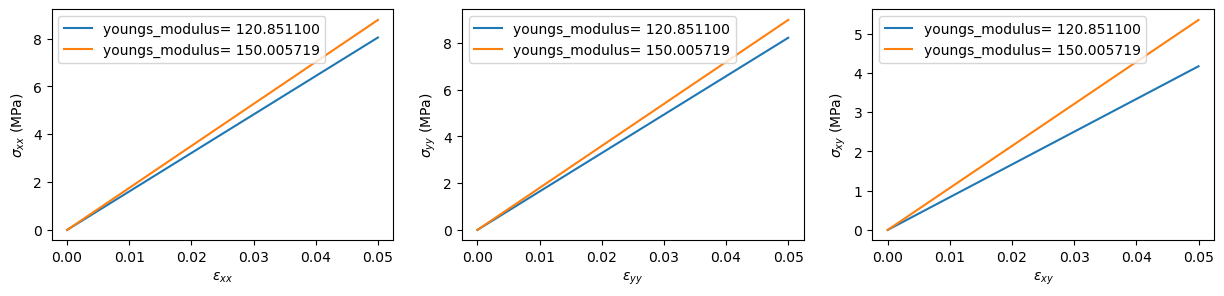

In [9]:
# plot the results 
plot_results(elatic_case_results)  # this function is not a function from the repo

In [10]:
from rvesimulator.benchmark_master_functions.single_material_sve import VonMisesPlasticRegularLoads

In [11]:
von_mises_case = VonMisesPlasticRegularLoads() 
von_mises_case.update_sim_info(strain=[0.05, 0.05, 0.05], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True)

Simulation information: 

{
    "job_name": "single_material_sve",
    "size": 1.0,
    "location_information": [
        [
            0.5,
            0.25,
            0.15,
            1
        ],
        [
            0.5,
            0.75,
            0.15,
            1
        ]
    ],
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "mesh_partition": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}


In [12]:
results_von_mises = von_mises_case.run_f3dasm(data=data)


/home/jiaxiangyi/Documents/rvesimulator/examples/single_material_sve/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<7 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.001341 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<5 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/examples/single_material_sve/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<5 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.003205 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<5 out of 30 licenses remain available>.


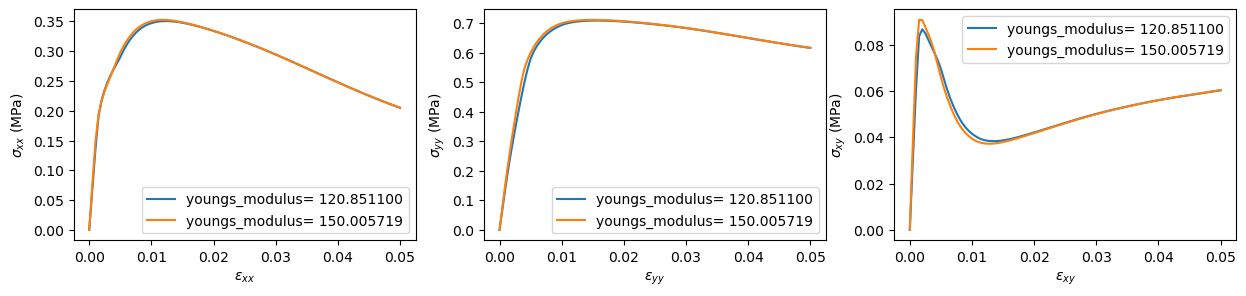

In [13]:
plot_results(results_von_mises) 

In [14]:
from rvesimulator.additionals.ampitudesampler import AmplitudeGenerator
from rvesimulator.benchmark_master_functions.single_material_sve import VonMisesPlasticPathLoads


In [16]:

# create the doe
num_amplitude = 2
path_sampler = AmplitudeGenerator(num_dim=3)
paths = path_sampler.get_amplitude(
    num_amplitude=2,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)

samples_dict = paths.to_dict("records")
print(paths)


                                    strain_amplitude
0  [[0.0, -0.010595103764888302, -0.0213440292295...
1  [[0.0, -0.017590200229051473, -0.0338813379698...


In [18]:

path_dependent_problem = VonMisesPlasticPathLoads()
path_dependent_problem.update_sim_info(strain=[0.02, 0.02, 0.02], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True)


Simulation information: 

{
    "job_name": "single_material_sve",
    "location_information": [
        [
            0.5,
            0.25,
            0.15,
            1
        ],
        [
            0.5,
            0.75,
            0.15,
            1
        ]
    ],
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "mesh_partition": 30,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}


In [19]:
path_dependent_results = {}
# calculate the initial responses of simulation
for ii in range(len(samples_dict)):
    path_dependent_results[ii] = path_dependent_problem.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii)

/home/jiaxiangyi/Documents/rvesimulator/examples/single_material_sve/Data/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<5 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :30.003172 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<5 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/examples/single_material_sve/Data/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<5 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :30.005097 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.


In [20]:
def plot_path_dependent(results, index):
    fig, ax = plt.subplots(2,3, figsize =(16, 8))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0,0].plot(
        results[index]["strain"][:, 0, 0],
    )
    ax[0,0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0,1].plot(
        results[index]["strain"][:, 0, 1],
    )
    ax[0,1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0,2].plot(
        results[index]["strain"][:, 1, 1],
    )
    ax[0,2].set(**pparam)

    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1,0].plot(
        results[index]["stress"][:, 0, 0],
    )
    ax[1,0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1,1].plot(
        results[index]["stress"][:, 0, 1],
    )
    ax[1,1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1,2].plot(
        results[index]["stress"][:, 1, 1],

    )
    plt.show()

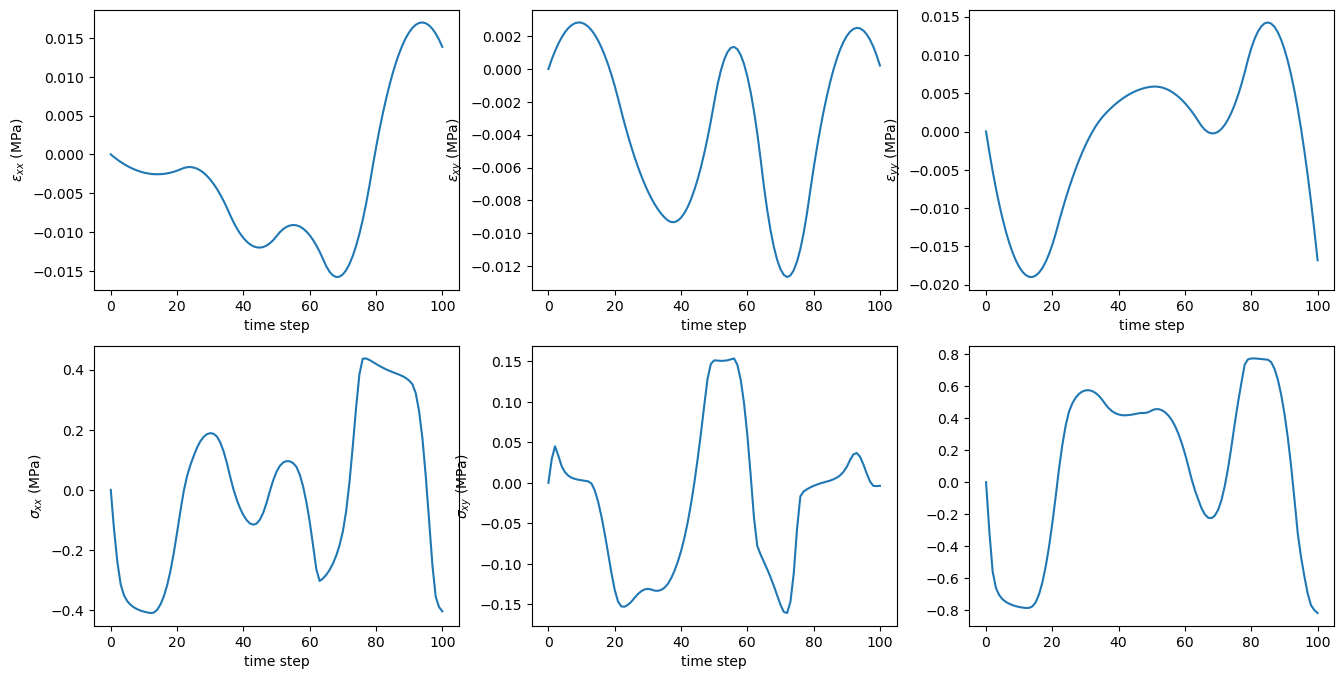

In [21]:
plot_path_dependent(path_dependent_results,1)
# path_dependent_results.keys()